<a href="https://colab.research.google.com/github/2303A51876/HPC_T.Shylasri/blob/main/HPC%20LAB-3%20Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#T.Shylari(2303A51876)
#Task-1
def serial_vector_op(A, B, alpha):
    C = np.empty_like(A)
    for i in range(len(A)):
        C[i] = alpha * A[i] + B[i]
    return C

In [6]:
#T.Shylari(2303A51876)
#Task-2
from numba import njit, prange
@njit(parallel=True)
def parallel_vector_op(A, B, alpha):
    C = np.empty_like(A)
    for i in prange(len(A)):
        C[i] = alpha * A[i] + B[i]
    return C

In [7]:
#T.Shylari(2303A51876)
#Task-3
import time
def measure_time(func, A, B, alpha):
    start = time.time()
    func(A, B, alpha)
    end = time.time()
    return end - start

In [9]:
#T.Shylari(2303A51876)
#Task-4(step-1)
import numpy as np
import time
import matplotlib.pyplot as plt
from numba import njit, prange

In [10]:
#T.Shylari(2303A51876)
#Task-4(step-2)
def serial_vector_op(A, B, alpha):
    C = np.empty_like(A)
    for i in range(len(A)):
        C[i] = alpha * A[i] + B[i]
    return C

In [11]:
#T.Shylari(2303A51876)
#Task-4(step-3)
@njit(parallel=True)
def parallel_vector_op(A, B, alpha):
    C = np.empty_like(A)
    for i in prange(len(A)):
        C[i] = alpha * A[i] + B[i]
    return C

In [12]:
#T.Shylari(2303A51876)
#Task-4(step-3)
def measure_time(func, A, B, alpha):
    start = time.time()
    func(A, B, alpha)
    end = time.time()
    return end - start

In [14]:
#T.Shylari(2303A51876)
#Task-4(step-4)
sizes = [10**5, 5*10**5, 10**6, 5*10**6]
alpha = 2.5
serial_times = []
parallel_times = []
print(f"{'Vector Size':>12} {'Serial Time(s)':>15} {'Parallel Time(s)':>18} {'Speedup':>10}")
print("-" * 60)
for n in sizes:
    A = np.random.rand(n)
    B = np.random.rand(n)
    # Warm-up run for Numba JIT
    parallel_vector_op(A, B, alpha)

    serial_time = measure_time(serial_vector_op, A, B, alpha)
    parallel_time = measure_time(parallel_vector_op, A, B, alpha)

    serial_times.append(serial_time)
    parallel_times.append(parallel_time)

    speedup = serial_time / parallel_time

    print(f"{n:>12} {serial_time:>15.6f} {parallel_time:>18.6f} {speedup:>10.2f}")


 Vector Size  Serial Time(s)   Parallel Time(s)    Speedup
------------------------------------------------------------
      100000        0.046059           0.000354     130.09
      500000        0.230227           0.001038     221.78
     1000000        0.445190           0.001973     225.60
     5000000        2.295558           0.019877     115.49


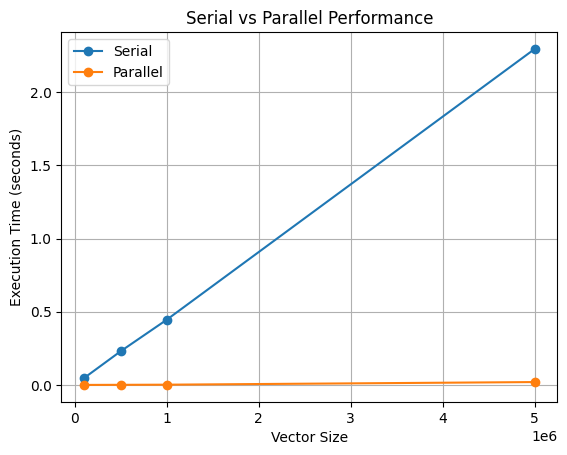

In [16]:
#T.Shylari(2303A51876)
#Execution Time Comparison
plt.figure()
plt.plot(sizes, serial_times, marker='o', label='Serial')
plt.plot(sizes, parallel_times, marker='o', label='Parallel')
plt.xlabel("Vector Size")
plt.ylabel("Execution Time (seconds)")
plt.title("Serial vs Parallel Performance")
plt.legend()
plt.grid(True)
plt.show()

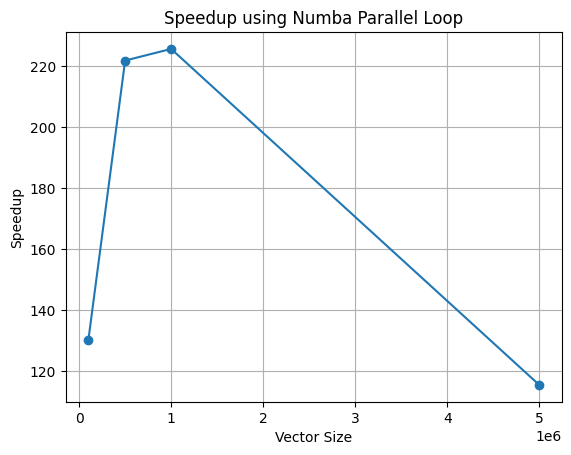

In [17]:
#T.Shylari(2303A51876)
#Speedup Graph
speedups = [s/p for s, p in zip(serial_times, parallel_times)]
plt.figure()
plt.plot(sizes, speedups, marker='o')
plt.xlabel("Vector Size")
plt.ylabel("Speedup")
plt.title("Speedup using Numba Parallel Loop")
plt.grid(True)
plt.show()